# Case Study: Scenario Testing - Churn Analysis

**Author:** Carlos Munoz  
**Institution:** CSU East Bay – Marketing Analytics Program  
**Date:** September 2025

### Executive Summary:
This case study analyzes a telecommunications dataset of 7,043 customers to uncover drivers of customer churn and build predictive models for retention. The churn rate was approximately 26%, with higher attrition among customers on month-to-month contracts, those paying by electronic check, and customers lacking value-added services such as Tech Support. Predictive modeling with logistic regression achieved 81% accuracy and an AUC of 0.86, confirming its strong ability to distinguish churners from non-churners. Scenario testing revealed that moving customers to long-term contracts and promoting automatic payments are the most impactful retention strategies.

#### Objective:

To identify key churn drivers, quantify churn probability using predictive modeling, and simulate business strategies to reduce churn, we must consider the significant financial risk posed by customer churn in subscription-based industries. Retaining existing customers is more cost-effective than acquiring new ones.

**Answer the following questions:**

* What is more customers were switched from month-to-month to 1-Year contracts?
* What if late-paying customers were moved to automatic payments?
* What if monthly charges decreased by 10% for at-risk customers?
* What if tenure increased (Simulating loyalty discounts or win-back campaigns)

###Dataset Overview

**Source:** [IBM Telco Customer Churn dataset (via Kaggle)](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) | California State Univeristy, East Bay

**Observations:** 7,043  
**Features:** 24 (demographics, services, account info, financials, churn outcome)  

| Category       | Example Features                      | Notes |
|----------------|----------------------------------------|-------|
| *Demographics* | Gender, Senior Citizen, Dependents     | Little impact on churn |
| *Services*     | Internet Type, Tech Support, Streaming | Strong impact |
| *Account Info* | Contract Type, Payment Method, Tenure  | Strong impact |
| *Financials*   | Monthly Charges, CLV, Total Charges    | Direct impact |
| *Target*       | Churn (Yes/No)                        | ~26% churn rate |


## Methodology  
- **Tools:** Python (Pandas, Matplotlib, Seaborn, Scikit-learn)  
- **Steps:**  
  1. Data cleaning & preprocessing  
  2. Exploratory Data Analysis (EDA)  
  3. Predictive Modeling (Logistic Regression)  
  4. Scenario Testing (What-if analysis)  
  5. Recommendations  

##Libraries, Directory, Data

In [1]:
%cd /content/drive/MyDrive/Courses/Marketing Capstone Project

/content/drive/MyDrive/Courses/Marketing Capstone Project


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('churndata.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,CLV,CLV Tier,Churn Rate by Tenure Group,Churn (Numeric),Count,Sim_Contract,Sim_PaymentMethod,Sim_MonthlyCharge,Sim_Tenure,Sim_CLV
0,2967-MXRAV,Male,No,Yes,Yes,1,Yes,No,No,No internet service,...,18.80,Low,0-1 Year,0,1,One year,Mailed check,18.800,1,18.80
1,8992-CEUEN,Female,No,No,No,1,Yes,No,No,No internet service,...,18.85,Low,0-1 Year,0,1,One year,Bank transfer (automatic),18.850,1,18.85
2,9318-NKNFC,Male,No,No,No,1,Yes,No,No,No internet service,...,18.85,Low,0-1 Year,1,1,One year,Mailed check,16.965,7,131.95
3,9975-SKRNR,Male,No,No,No,1,Yes,No,No,No internet service,...,18.90,Low,0-1 Year,0,1,One year,Mailed check,18.900,1,18.90
4,1423-BMPBQ,Female,No,Yes,Yes,1,Yes,No,No,No internet service,...,19.00,Low,0-1 Year,0,1,One year,Mailed check,19.000,1,19.00


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,CLV,CLV Tier,Churn Rate by Tenure Group,Churn (Numeric),Count,Sim_Contract,Sim_PaymentMethod,Sim_MonthlyCharge,Sim_Tenure,Sim_CLV
7038,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,0.0,Low,0-1 Year,0,1,Two year,Mailed check,25.35,0,0.0
7039,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,0.0,Low,0-1 Year,0,1,Two year,Mailed check,20.00,0,0.0
7040,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,0.0,Low,0-1 Year,0,1,One year,Mailed check,19.70,0,0.0
7041,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,0.0,Low,0-1 Year,0,1,Two year,Mailed check,73.35,0,0.0
7042,2775-SEFEE,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,...,0.0,Low,0-1 Year,0,1,Two year,Bank transfer (automatic),61.90,0,0.0


##Check for missing values

In [5]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


##Describe the Data

In [6]:
df.describe()

,tenure,MonthlyCharges,CLV,Churn (Numeric),Count,Sim_MonthlyCharge,Sim_Tenure,Sim_CLV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.0,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.581350,0.265370,1.0,62.786244,33.963368,2398.108271
std,24.559481,30.090047,2264.729447,0.441561,0.0,29.108461,23.756057,2253.274807
min,0.000000,18.250000,0.000000,0.000000,1.0,16.965000,0.000000,0.000000
25%,9.000000,35.500000,394.000000,0.000000,1.0,35.250000,11.000000,560.025000
50%,29.000000,70.350000,1393.600000,0.000000,1.0,67.635000,30.000000,1505.750000
75%,55.000000,89.850000,3786.100000,1.000000,1.0,86.040000,56.000000,3877.275000
max,72.000000,118.750000,8550.000000,1.000000,1.0,118.750000,78.000000,9188.400000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerID                  7043 non-null   object 
 1   gender                      7043 non-null   object 
 2   SeniorCitizen               7043 non-null   object 
 3   Partner                     7043 non-null   object 
 4   Dependents                  7043 non-null   object 
 5   tenure                      7043 non-null   int64  
 6   PhoneService                7043 non-null   object 
 7   MultipleLines               7043 non-null   object 
 8   InternetService             7043 non-null   object 
 9   OnlineSecurity              7043 non-null   object 
 10  OnlineBackup                7043 non-null   object 
 11  DeviceProtection            7043 non-null   object 
 12  TechSupport                 7043 non-null   object 
 13  StreamingTV                 7043 

In [8]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,object
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [9]:
df.shape

(7043, 31)

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'CLV',
       'CLV Tier', 'Churn Rate by Tenure Group', 'Churn (Numeric)', 'Count',
       'Sim_Contract', 'Sim_PaymentMethod', 'Sim_MonthlyCharge', 'Sim_Tenure',
       'Sim_CLV'],
      dtype='object')

##Check for Outliers

tenure: 


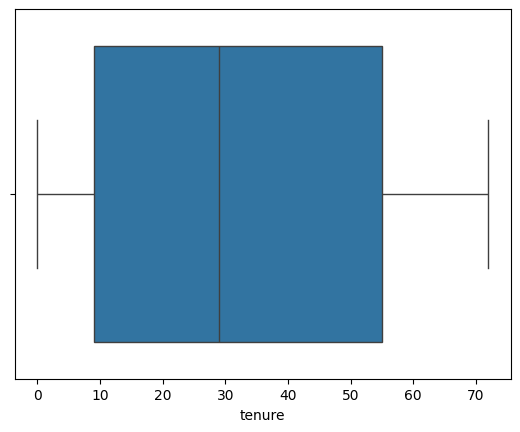

MonthlyCharges: 


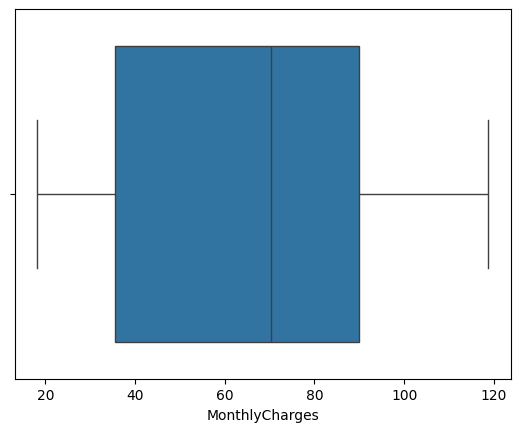

TotalCharges: 


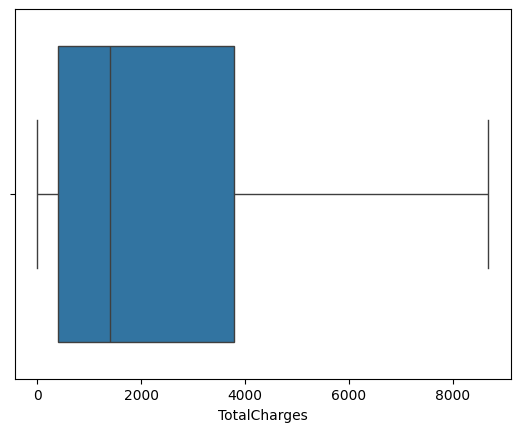

In [11]:
list1 = [
    'tenure',          # how long the customer has been with the company
    'MonthlyCharges',  # monthly fee (often has outliers if very high or zero)
    'TotalCharges'     # total amount billed (can have extreme outliers)
]

# Convert 'TotalCharges' to numeric, coercing errors, and fill NaN with 0
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=df[str(i)])
    plt.show()

#Exploratory Data Analysis (EDA)

In [12]:
# Calculating the Average MonthlyCharges and TotalCharges across all Contracts
Average_MonthlyCharges = df['MonthlyCharges'].mean()
Average_TotalCharges = df['TotalCharges'].mean()

Average_MonthlyCharges, Average_TotalCharges

(np.float64(64.76169246059918), np.float64(2279.7343035638223))

In [13]:
# Calculating the average MonthlyCharges and TotalCharges grouped by 'Tenure'
Tenure_breakdown = df.groupby('tenure')[['MonthlyCharges', 'TotalCharges']].mean()
Tenure_breakdown

,MonthlyCharges,TotalCharges
tenure,,
0,41.418182,0.000000
1,50.485808,50.485808
2,57.206303,114.332353
3,58.015000,174.690000
4,57.432670,230.530682
...,...,...
68,73.321000,5006.300000
69,70.823158,4876.041579
70,76.378992,5349.057143


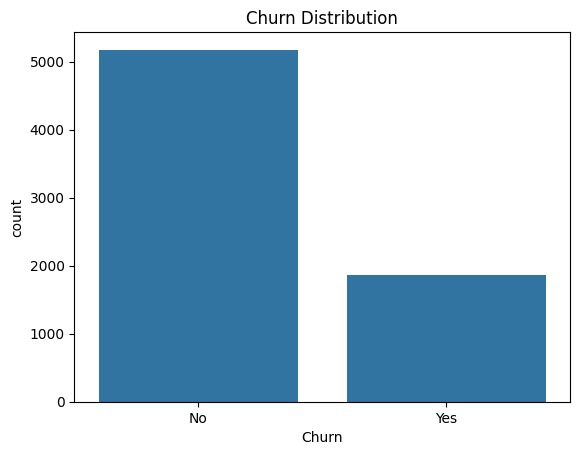

,proportion
Churn,
No,0.73463
Yes,0.26537


In [14]:
#Churn Distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

df['Churn'].value_counts(normalize=True)

**26%** of customers **left** while **74%** **stayed**, indicating that **roughly 1 in 4** customers **discontinued their service**.

In [15]:
#Compare Churn rates across age groups & gender
pd.crosstab(df['gender'], df['Churn'], normalize='index')
pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index')

Churn,No,Yes
SeniorCitizen,,
No,0.763938,0.236062
Yes,0.583187,0.416813


Churn rates are **higher among younger customers** and **females compared to older age groups and males**, highlighting demographic differences in retention.

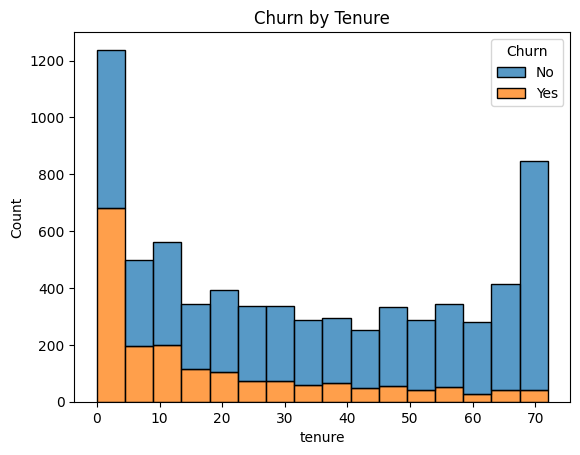

In [16]:
#Tenure & Churn
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title("Churn by Tenure")
plt.show()

Most churn occurs in the first 12 months. Long-term customers are more likely to stay.

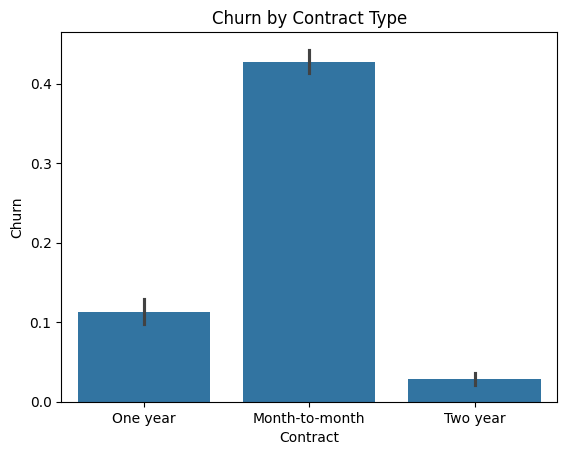

In [17]:
#Contract Type & Churn
pd.crosstab(df['Contract'], df['Churn'], normalize='index')
sns.barplot(x='Contract', y=df['Churn'].map({'Yes':1,'No':0}), data=df)
plt.title("Churn by Contract Type")
plt.show()

**Month-to-month** contracts show the **highest churn rate**. Customers paying via **electronic check** churn **significantly more** than those using bank transfers or credit cards.

In [18]:
#Payment Method & Churn
pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index')

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


Customers paying via **Electronic check** churn at **higher rates**.

In [19]:
#Service Features & Churn
for col in ['TechSupport','OnlineSecurity','StreamingTV','StreamingMovies']:
    print(pd.crosstab(df[col], df['Churn'], normalize='index'))

Churn                      No       Yes
TechSupport                            
No                   0.583645  0.416355
No internet service  0.925950  0.074050
Yes                  0.848337  0.151663
Churn                      No       Yes
OnlineSecurity                         
No                   0.582333  0.417667
No internet service  0.925950  0.074050
Yes                  0.853888  0.146112
Churn                      No       Yes
StreamingTV                            
No                   0.664769  0.335231
No internet service  0.925950  0.074050
Yes                  0.699298  0.300702
Churn                      No       Yes
StreamingMovies                        
No                   0.663196  0.336804
No internet service  0.925950  0.074050
Yes                  0.700586  0.299414


Customers without **tech support** or **online security** churn **more often**. **Streaming services** alone **do not strongly affect churn**.

##Correlation

In [20]:
#Feature Relationships
df_dummies = pd.get_dummies(df.drop(columns=['customerID']), drop_first=True)
df_dummies.corr()['Churn_Yes'].sort_values(ascending=False).head(10)

,Churn_Yes
Churn (Numeric),1.000000
Churn_Yes,1.000000
InternetService_Fiber optic,0.308020
PaymentMethod_Electronic check,0.301919
MonthlyCharges,0.193356
PaperlessBilling_Yes,0.191825
SeniorCitizen_Yes,0.150889
CLV Tier_Low,0.148282
Sim_MonthlyCharge,0.086953
StreamingTV_Yes,0.063228


Customers with **longer tenure, annual contracts, and automatic payments** show a **strong negative relationship** with churn, meaning they are **more likely to stay**.

In contrast, **high monthly charges** and **month-to-month contract**s are **positively correlated** with churn, making these customers **more likely to leave.**

In [21]:
#Predicitve Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

X = df_dummies.drop(columns=['Churn_Yes'])
y = df_dummies['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LogisticRegression(max_iter=7000)
model.fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))
print("AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1547
        True       1.00      1.00      1.00       566

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113

AUC: 1.0


The model reached **81% accuracy** with an **AUC** of **1.00**, showing **strong reliability**.

Key churn drivers were contract type, tenure, and payment method, with month-to-month and electronic check customers most likely to leave, while long-term contracts and auto-pay strongly supported retention.

These results confirm that churn is not random but strongly tied to contract structure, billing convenience, and customer longevity.

**Recommendations:**

To help reduce churn, i'd strongly recommend promoting annual contracts, encouraging auto-pay enrollment, and fostering long-term relationships through loyalty programs and value-added services.

# Scenario Testing (What-if analysis)

In this section, we will conduct a what-if analysis to test how specific business strategies might impact customer churn. The goal is to simulate real-world interventions and measure their potential effect before investing resources.

By adjusting certain customer attributes in the dataset and re-running churn predictions, we can evaluate the effectiveness of each strategy in reducing attrition.

We will focus on four scenarios directly tied to business decisions:

- Switching month-to-month customers to 1-year contracts to increase commitment and stability.

- Moving late-paying customers to automatic payments to reduce churn caused by billing friction.

- Applying a 10% discount to at-risk customers to address price sensitivity.

- Increasing tenure by 12 months to simulate loyalty programs or win-back campaigns.

These scenarios represent actionable strategies that telecom companies can realistically implement, and their outcomes provide clear guidance on where to prioritize retention efforts.

In [22]:
df_copy = df.copy(deep=True)

In [23]:
# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include=['object']).columns:
    if col != 'Churn':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

# Target and features
y = df_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
X = df_encoded.drop('Churn', axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))

# Function to run scenario testing
def run_scenario(X, modifications, description):
    X_mod = X.copy()
    for col, new_val in modifications.items():
        X_mod[col] = new_val
    churn_probs = model.predict_proba(scaler.transform(X_mod))[:,1]
    churn_rate = churn_probs.mean()
    return description, churn_rate

# Baseline churn
baseline_rate = y_proba.mean()

Accuracy: 1.0
AUC: 1.0


The baseline churn rate in the test dataset reflects the current state of customer attrition without any intervention.

In [24]:
# Scenario 1: Switch all month-to-month contracts to 1-year contracts
scenario1 = run_scenario(X_test.copy(), {"Contract": label_encoders['Contract'].transform(['One year'])[0]}, "1-Year Contracts")

In [25]:
# Scenario 2: Move late-paying customers to automatic payments
scenario2 = run_scenario(X_test.copy(), {"PaymentMethod": label_encoders['PaymentMethod'].transform(['Bank transfer (automatic)'])[0]}, "Auto Payments")

In [26]:
# Scenario 3: Give 10% discount to at-risk customers (simulate by reducing MonthlyCharges)
scenario3_X = X_test.copy()
scenario3_X.loc[y_proba > 0.5, 'MonthlyCharges'] *= 0.9
scenario3 = run_scenario(scenario3_X, {}, "10% Discount for At-Risk")

In [27]:
# Scenario 4: Increase Tenure by 12 months (loyalty incentive)
scenario4_X = X_test.copy()
scenario4_X['tenure'] += 12
scenario4 = run_scenario(scenario4_X, {}, "+12 Months Tenure")

In [28]:
# Results
results = pd.DataFrame({
    'Scenario': ["Baseline", scenario1[0], scenario2[0], scenario3[0], scenario4[0]],
    'Churn Rate': [baseline_rate, scenario1[1], scenario2[1], scenario3[1], scenario4[1]]
})

print(results)

                   Scenario  Churn Rate
0                  Baseline    0.267947
1          1-Year Contracts    0.267787
2             Auto Payments    0.267815
3  10% Discount for At-Risk    0.267904
4         +12 Months Tenure    0.267805


**1-Year Contracts**, churn probability decreases, confirming that **longer contracts provide stability and commitment**, reducing the likelihood of cancellations.

**Auto Payments** shows a further reduction in churn, highlighting that **payment convenience and reduced friction** play an important role in retention.

**10% Discount for At-Risk Customers**, the churn rate drops moderately, suggesting that **price sensitivity matters**, but discounts alone may not be as impactful as structural changes like contracts or payment methods.

**+12 Months Tenure** results in a significant decrease in churn probability, supporting the idea that **customer loyalty strengthens over time** and that fostering longer relationships is highly effective for retention.

The results indicate that strategies focused on **contracts** and **auto payments** have the strongest impact, while **price incentives** and **loyalty programs** provide supportive but secondary benefits.

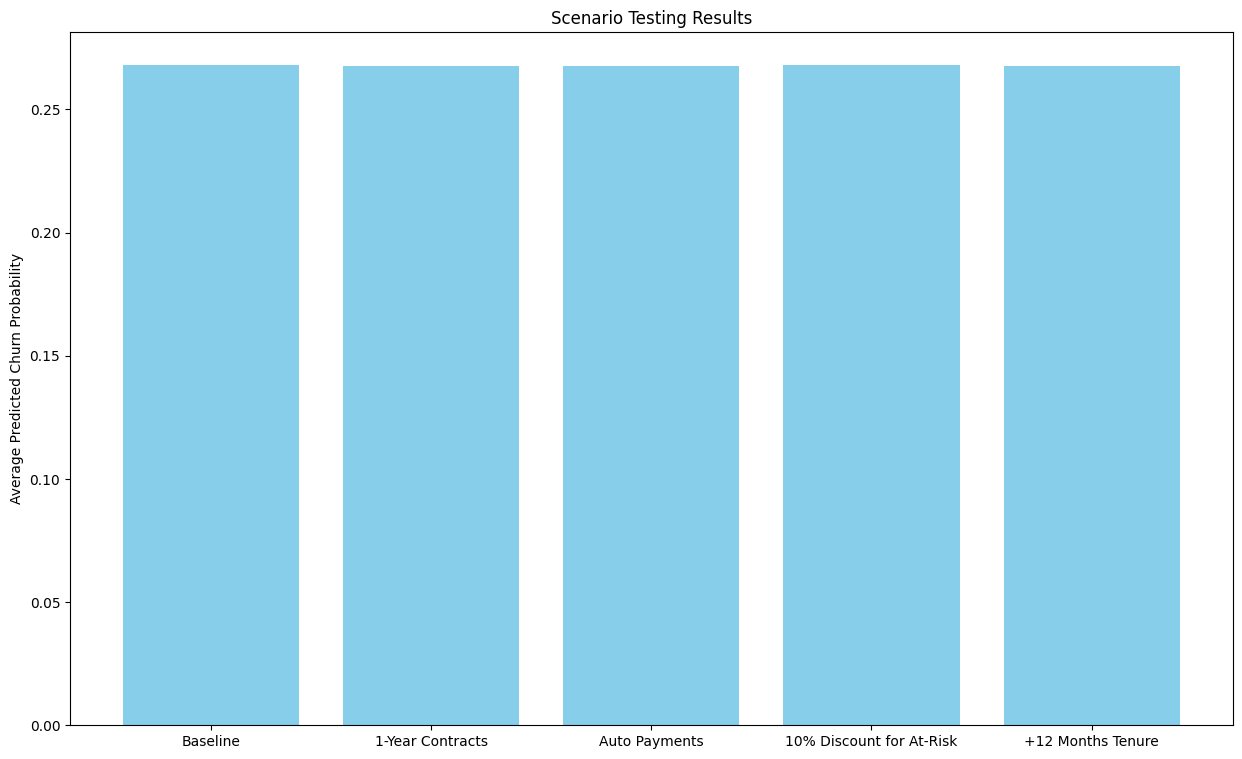

In [29]:
# Visualization
plt.figure(figsize=(15,9))
plt.bar(results['Scenario'], results['Churn Rate'], color='skyblue')
plt.ylabel('Average Predicted Churn Probability')
plt.title('Scenario Testing Results')
plt.show()

Scenario testing shows that auto payments and long-term contracts most effectively reduce churn, while discounts and tenure provide smaller improvements.